### Installing Dependancies

In [30]:
pip install nelson_siegel_svensson

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np
from numpy import linalg as LA
import seaborn as sns

# Task 2

### Q2. a) Pick government securities from a country. The country selected should be one of the countries from your group so that you can fit a Nelson-Siegel model.

### Q2. b) Be sure to pick maturities ranging from short-term to long-term (e.g. 6 month maturity to 20 or 30 year maturities).

We selected the country - India. The following dataset contains the daily yields of the Indian bonds with the following maturities from 2006 to 2025(current).

| Maturity  | Source                                                                 |
|-----------|------------------------------------------------------------------------|
| 3 Months  | [India 3-Month Bond Yield](https://in.investing.com/rates-bonds/india-3-month-bond-yield-historical-data) |
| 6 Months  | [India 6-Month Bond Yield](https://in.investing.com/rates-bonds/india-6-month-bond-yield-historical-data) |
| 1 Year  | [India 1-Year Bond Yield](https://in.investing.com/rates-bonds/india-1-year-bond-yield-historical-data) |
| 2 Year  | [India 2-Year Bond Yield](https://in.investing.com/rates-bonds/india-2-year-bond-yield-historical-data) |
| 3 Year  | [India 3-Year Bond Yield](https://in.investing.com/rates-bonds/india-3-year-bond-yield-historical-data) |
| 4 Year  | [India 4-Year Bond Yield](https://in.investing.com/rates-bonds/india-4-year-bond-yield-historical-data) |
| 5 Year  | [India 5-Year Bond Yield](https://in.investing.com/rates-bonds/india-5-year-bond-yield-historical-data) |
| 6 Year  | [India 6-Year Bond Yield](https://in.investing.com/rates-bonds/india-6-year-bond-yield-historical-data) |
| 7 Year  | [India 7-Year Bond Yield](https://in.investing.com/rates-bonds/india-7-year-bond-yield-historical-data) |
| 8 Year  | [India 8-Year Bond Yield](https://in.investing.com/rates-bonds/india-8-year-bond-yield-historical-data) |
| 9 Year  | [India 9-Year Bond Yield](https://in.investing.com/rates-bonds/india-9-year-bond-yield-historical-data) |
| 10 Year  | [India 10-Year Bond Yield](https://in.investing.com/rates-bonds/india-10-year-bond-yield-historical-data) |
| 12 Year  | [India 12-Year Bond Yield](https://in.investing.com/rates-bonds/india-12-year-bond-yield-historical-data) |
| 15 Year  | [India 15-Year Bond Yield](https://in.investing.com/rates-bonds/india-15-year-bond-yield-historical-data) |
| 24 Year  | [India 24-Year Bond Yield](https://in.investing.com/rates-bonds/india-24-year-bond-yield-historical-data) |
| 30 Year  | [India 30-Year Bond Yield](https://in.investing.com/rates-bonds/india-30-year-bond-yield-historical-data) |


In [32]:
df = pd.read_csv('/content/drive/MyDrive/WQU/India Bond Yield Data.csv') # Change the file path as the path in your device.

df.index = pd.to_datetime(df['Date'])

df = df.drop('Date', axis=1)
df = df.dropna()

In [33]:
def plot_std(df):
  """
  Plotting the standard deviation of the treasury yields for different maturities
  """

  y_std = df.std()
  fig, ax = plt.subplots()
  y_std.plot(figsize = (8,5),marker='o', title='Standard Deviations of Treasury Yields for Different Maturities', alpha=0.8)
  plt.xlabel("Maturity")
  plt.ylabel("Standard Deviation")
  for i in range(len(y_std)):
      ax.annotate(str(round(y_std.iloc[i],2)),xy=(i,y_std.iloc[i]))
  plt.show()

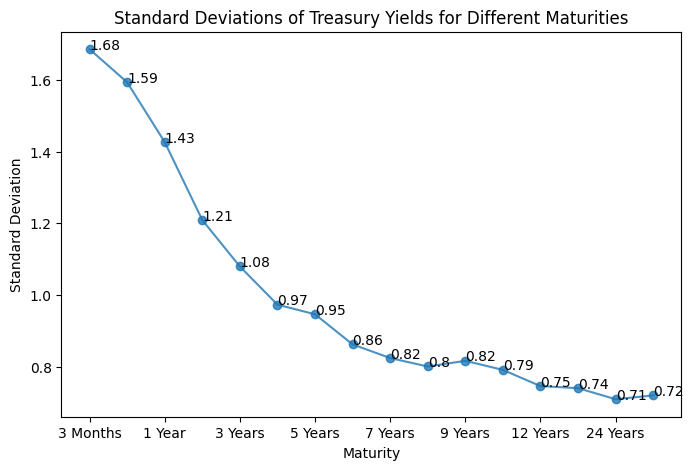

In [34]:
plot_std(df)

In [35]:
def plot_yield_curve(date, fig_n):
    """
    Plotting the yield curve for a given date
    """

    maturities = df.columns # Maturities
    fig, ax = plt.subplots(figsize=(6.15, 4))
    ax.plot(maturities, df.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    labels = [m if i % 5 == 0 else '' for i, m in enumerate(maturities)]
    ax.set_xticklabels(labels)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title(fig_n+f'Treasury Yield Curve as of {date}')

    # Show the plot
    plt.grid(False)
    plt.show()

### Q2. c) Fit a Nelson-Siegel model.


Fitting a Nelson Siegel Model on all the maturities on a specific date and comparing it with the original yield curve as of that date

In [36]:
def fit_ns(t, y, tau0=1.0):
  """
  Fitting the Nelson-Siegel model to the yield curve data for a given date.
  """

  curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
  assert status.success

  print(curve)

  return curve

In [37]:
def plot_ns(date, y_hat, t_hat):
  """
  Plotting the yield curve for a given date.
  """

  plt.plot(t_hat, y_hat(t_hat))
  plt.xlabel("Maturity")
  plt.ylabel("Yield")
  plt.title(f"NS Model Result as of {date}")

  plt.show()

NelsonSiegelCurve(beta0=np.float64(7.262536960509667), beta1=np.float64(-2.273671047246356), beta2=np.float64(-1.779216868209846), tau=np.float64(0.9062504579008243))


<ipython-input-35-f6116200d263>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


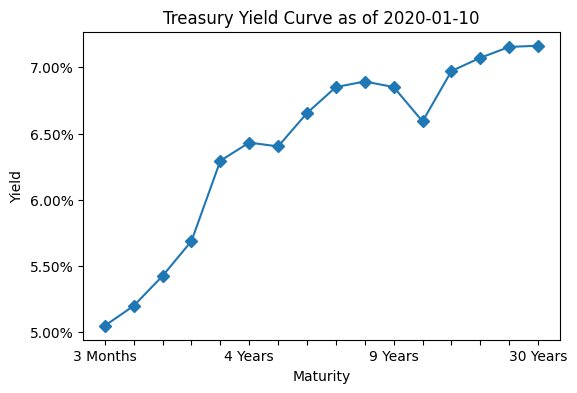

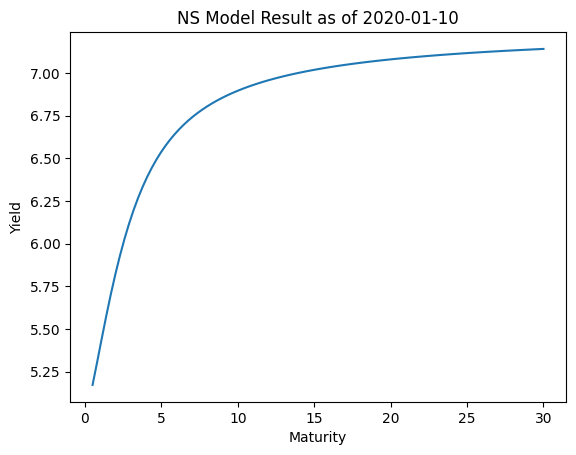

In [38]:
date = "2020-01-10"
t = np.array([0.25,0.5,1,2,3,4,5,6,7,8,9,10,12,15,24,30])
y = np.array(df.loc[date])
curve = fit_ns(t, y, tau0=1.0)
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plot_yield_curve(date,'')
plot_ns(date, y_hat, t_hat)

### Q2. f) f. Be sure to specify at the levels of model parameters (ex. Alpha1).

In the solution above, we have fit a Nelson Siegel Model on the yield curve as of 2020-01-10. The result `NelsonSiegelCurve(beta0=np.float64(7.262536960509667), beta1=np.float64(-2.273671047246356), beta2=np.float64(-1.779216868209846), tau=np.float64(0.9062504579008243))` indicates that the $\beta_0$ = 7.26 showing the level of the yield curve. $\beta_1$ = -2.27 shows the slope of the yield curve and the $\beta2$ = -1.77 shows the shape or the curvature of the yield curve. the decay rate indicated by $\tau$ = 0.91 showing a slow rate of decay.

A level of 7.26 shows that the long term expectation of the yields to be around 7%.

A negative slope can be attributed to the fact that there are dips in the long term yields, for example the 10 year yield is smaller than the 6 years, 7years and 8 years yields.

A negative curvature indicates a concave behaviour. The yields started rising steep in the short run, but flatten over a longer period.


This interpretation is in line with the mid pandemic situation in 2020. Complete economic shutdowns has raised riskiness of the short term borrowings, hence the rise in yields sharply.


A smaller value of $\tau$ (close to 1) indicates that the effects of the slope and curvature parameters decay relatively slowly as maturity increases. This suggests that the short-to-medium-term rates have a strong influence on the shape of the curve, but as maturity increases, the curve flattens, and the level dominates.

### Q2. d) Fit a Cubic Spline model.
### Q2. f) Be sure to specify at the levels of model parameters (ex. Alpha1).

Fitting a Cubic Spline Model on all the maturities on a specific date and comparing it with the original yield curve as of that date.

Since there are 16 maturities, there would be 15 splines that pass through the 16 points. The splines can be shown as follows:

<br>

$$
f\left( x \right)=a_{1}x^{3}+b_{1}x^{2}+c_{1}x+d_{1}, \quad \text{when } 0.25 \le x \le 0.5
$$

$$
f\left( x \right)=a_{2}x^{3}+b_{2}x^{2}+c_{2}x+d_{2}, \quad \text{when } 0.5 \le x \le 1
$$

$$
f\left( x \right)=a_{3}x^{3}+b_{3}x^{2}+c_{3}x+d_{3}, \quad \text{when } 1 \le x \le 2
$$

and so on...
<br>

From the above equations, we have \( 15 $\times$ 4 = 60 \) unknowns. Hence, we need 60 equations to solve for the parameters.

Thus plugging each boundary, we get 30 equations as shown below:

<br>
$$a_{1}(0.25)^{3}+b_{1}(0.25)^{2}+c_{1}(0.25)+d_{1}=5.05\;\;\;(1)$$
$$a_{1}(0.5)^{3}+b_{1}(0.5)^{2}+c_{1}(0.5)+d_{1}=5.2\;\;\;(2)$$
<br>
<br>
$$a_{2}(0.5)^{3}+b_{2}(0.5)^{2}+c_{2}(0.5)+d_{2}=5.2\;\;\;(3)$$
$$a_{2}(1)^{3}+b_{2}(1)^{2}+c_{2}(1)+d_{2}=5.42\;\;\;(4)$$
<br>
<br>
$$a_{3}(1)^{3}+b_{3}(1)^{2}+c_{3}(1)+d_{3}=5.42\;\;\;(5)$$
$$a_{3}(2)^{3}+b_{3}(2)^{2}+c_{3}(2)+d_{3}=5.69\;\;\;(6)$$
<br>
<br>

Now since each interirior point is a part of 2 splines, their slopes and curvatures must be the same. Therefore, their first order derivatives and their second order derivatives should be the same. Since there are \( 16 - 2 = 14 \) interior points, we get 14 first order equations, and 14 second order equations.

The first order equations are as follows:

<br>
$$3a_{1}(0.5)^{2}+2b_{1}(0.5)+c_{1}=3a_{2}(0.5)^{2}+2b_{2}(0.5)+c_{2}\;\;\;(31)$$
$$3a_{2}(1)^{2}+2b_{2}(1)+c_{2}=3a_{3}(1)^{2}+2b_{3}(1)+c_{3}\;\;\;(32)$$
<br>

The second order equations are as follows:

<br>
$$6a_{1}(0.5)+2b_{1}=6a_{2}(0.5)+2b_{2}\;\;\;(45)$$
$$6a_{2}(1)+2b_{2}=6a_{3}(1)+2b_{3}\;\;\;(46)$$
<br>

In total now we have 58 equations. Finally we assume the "Natural End Condition" and consider the secodn order derivatives of the exterior p[oints to be 0/ Since there are 2 exterior points, we get 2 equations, which gives us full 60 equations.

<br>
$$6a_{1}(0.25)+2b_{1}=0\;\;\;(59)$$
$$6a_{3}(30)+2b_{3}=0\;\;\;(60)$$
<br>

To calculate the cubic spline model, we use the `CubicSpline` function from the **SciPy** library, typically imported as `cs`.

The command is:

`
cs = CubicSpline(t, y, bc_type=((2, 0.0), (2, 0.0)))
`

where:

- `t` = maturities  
- `y` = yields as of a specific date  
- `bc_type=((2, 0.0), (2, 0.0))` sets the **natural end condition** by specifying that the second derivative at the two endpoints is zero.

In [39]:
def fit_cs(t, y, t_hat):
  """
  Fitting a Cubic Spline Model on all the maturities on a specific date.
  """
  cs = CubicSpline(t, y, bc_type=((2, 0.0), (2, 0.0)))
  interpolated_yields = cs(t_hat)
  plt.plot(t_hat, interpolated_yields)



<ipython-input-35-f6116200d263>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


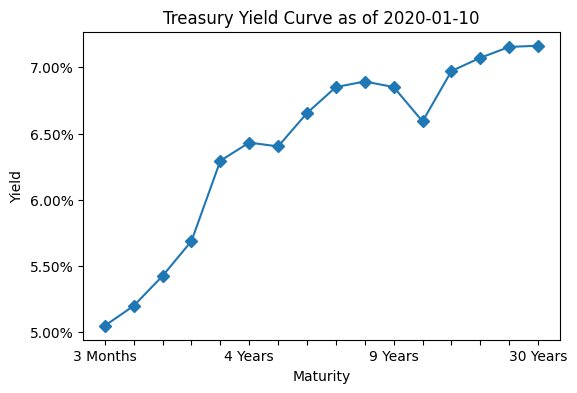

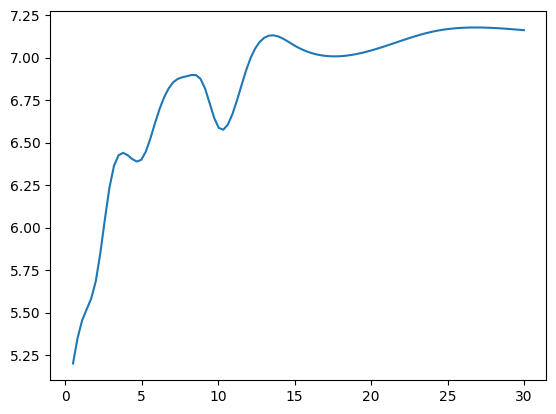

In [40]:
date = "2020-01-10"
t = np.array([0.25,0.5,1,2,3,4,5,6,7,8,9,10,12,15,24,30])
y = np.array(df.loc[date])
t_hat = np.linspace(0.5,30,100)
plot_yield_curve(date,'')
fit_cs(t, y, t_hat)

### Q2. e) Compare the models in terms of 1) fit and 2) interpretation.


Fit:
- NS Model is a parametric model with defined parameters $\beta_0 , \beta_1$ and  $\beta_2$. The model smoothened the trend of the yield curve and just fit the general level witht the slope and curvature of the curve. It failed to capture the nuances of the mid term maturities. Features like a lower yield in the 10 year maturity did not get captured in the NS Model.

- Cubic Spline is a non parametric model which fits a spline between each point individually and thus captures a much more nuanced view of the yield curve. The fit is indeed much better than the NS Model.

Interpretation:
- Since NS is a parametric approach, its parameters have a strict economic interpretation.
    - $\beta_0$ : Level
    - $\beta_1$ : Slope
    - $\beta_2$ : Curvature
    - $\tau$ : Decay Rate

  It is helpful in making economic decision based on these parameters.

- Cubic Spline takes a non parametric approach and as a result does not have a direct economic interpretation. Its use cases are when one needs a data driven approach to mapping the yield movements, with a certain degree of smoothing involved. However, It is very succeptible to overfitting. Thus one must be careful towards the model complexity-overfitting tradeoff.  

### Q2. g) In Module 2 Lesson 4 (‘Smoothing Data’), we said smoothing data can be unethical. If Nelson-Siegel is smoothing the yield curve, is this considered unethical? Why or why not?


Indeed Smoothing data can be considered unethical, as discussed in M2 L4. Howver, whether or not the NS model smoothing is unethical, depends on the specific use cases.

NS Model is a parametric approach to smoothen out the yield curve based on its broad economic parameters, $\beta_0, \beta_1, \beta_2$ and $\tau$. It aims to provide a simpified picture of the economic conditions based on the yields, to provide insights on the expected trends in the market both in the short and long term. In this case the smoothing out is not done to hide variability, it is done to cancel out the noise to identify trends. It is not unethical to smoothen the curve via NS Model in this case.

However, say in a situation where the user does the simplification, but fails to disclose it, with a purpose of hiding variability, or hiding a sharp downturn in the yields, it becomes unethical.

# Task 3

Q3. a & b) Generating 5 Gausian uncorrelated random variables and running Principal Components on Covariance Matrix

In [41]:
np.random.seed(42)
sim_yld = np.random.normal(loc = 0, scale = 0.01, size = (200,5))
yld = pd.DataFrame(sim_yld, columns = ['3 Months', '1 Year', '3 Years', '10 Years', '30 Years'])
mean_yld = yld.mean()
std_yld = yld.std()
yc_standardised = (yld - mean_yld) / std_yld
std_data_cov = yc_standardised.cov()
eigenvalues, eigenvectors = LA.eig(std_data_cov)
principal_components = yc_standardised.dot(eigenvectors)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5"]
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,6))
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,0.821674,16.43%
2,1.169212,23.38%
3,0.929294,18.59%
4,1.066514,21.33%
5,1.013305,20.27%


Q3. c) The above df shows the principal componentsw described by their eigen values and the amount of explanation of the variance they respectively do. As we can see that in case of random variables, which are uncorrelated, the 5 principal components more or less describe an equal proportion of the variance. This can be owed to the fact that the multivariate distributions are i.i.d across the observations.

Q3 d) Plotting the Scree plot of the variance explained by each component.

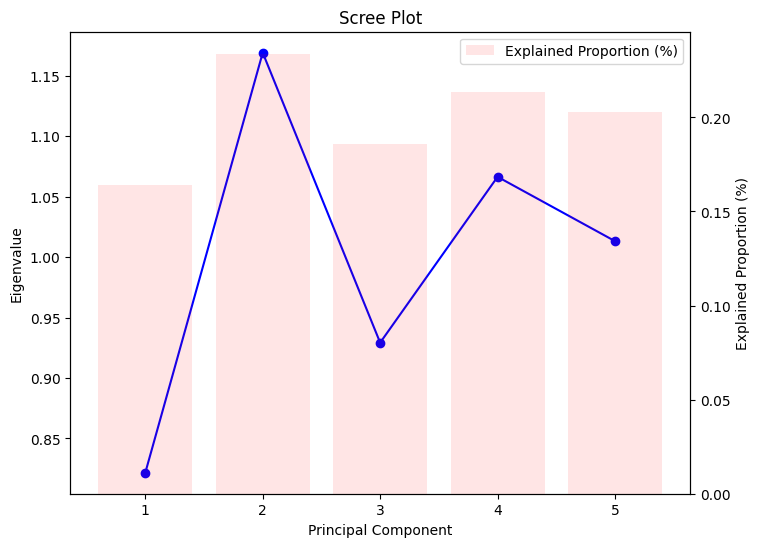

In [42]:
# Plotting the Scree plot

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), df_eigval['Eigenvalues'], marker='o', linestyle='-', color='b', label='Eigenvalues')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, 6))

# Step 2: Plotting explained proportion as bars

plt.twinx()
plt.bar(range(1, 6), df_eigval['Explained proportion'], alpha=0.1, color='r', label="Explained Proportion (%)")
plt.ylabel("Explained Proportion (%)")

plt.grid(False)
plt.legend(loc="upper right")
plt.show()


Here we can see that the explained variance does not reduce as the number of principal components increase. Infact they explain more or less similar proportions of the variance.

Q3. e & f) Loading actual data of government securities, for the past 6 months and converting yields into yield changes.

In [43]:
df = pd.read_csv('/content/drive/MyDrive/WQU/India Bond Yield Data.csv')
df.index = pd.to_datetime(df['Date'])
df_sec = df[df.index >= (df.index.max() - pd.DateOffset(months=6))]

# Selecting 5 securities
df_sec = df_sec[['3 Months', '1 Year', '3 Years', '10 Years', '30 Years']]

# Converting yields into yield changes and dropping NaNs
df_pct_chg = df_sec.pct_change().dropna()

Q3. g) Running Principal Components on original yields, using covariance matrix.

In [44]:
yld_chg_mean = df_pct_chg.mean()
yld_chg_std = df_pct_chg.std()
standardized_yld_chag = (df_pct_chg - yld_chg_mean) / yld_chg_std
std_yld_chg_cov = standardized_yld_chag.cov()
eigenvalues_yld, eigenvectors_yld = LA.eig(std_yld_chg_cov)
principal_components = standardized_yld_chag.dot(eigenvectors_yld)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5"]
df_eigval_yld = pd.DataFrame({"Eigenvalues":eigenvalues_yld}, index=range(1,6))
df_eigval_yld["Explained proportion"] = df_eigval_yld["Eigenvalues"] / np.sum(df_eigval_yld["Eigenvalues"])
df_eigval_yld.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,2.692920,53.86%
2,1.046973,20.94%
3,0.754758,15.10%
4,0.122989,2.46%
5,0.382360,7.65%


Q3. h) From the above df we can see a different picture regarding the eigenvectors and their explanation of the variance. The first PC explains more than 50% of the variance in the yields. This is the "Level" of the yield curve. This shows the long term expectations of the yields. The secodn PC explains almost 21% of the variance. We can interpret this as the "Slope" of the yield curve. Finally the 3rd PC explains about 15% of the variance, and this can be attributed to the "Curvature" of the yield curve, or how fast the slope is changing. The last 2 PCs explain relatively lower proportion of the variance, since the level, slope and curvature are the 3 main principal components.

Q3. i) Producing Scree Plot

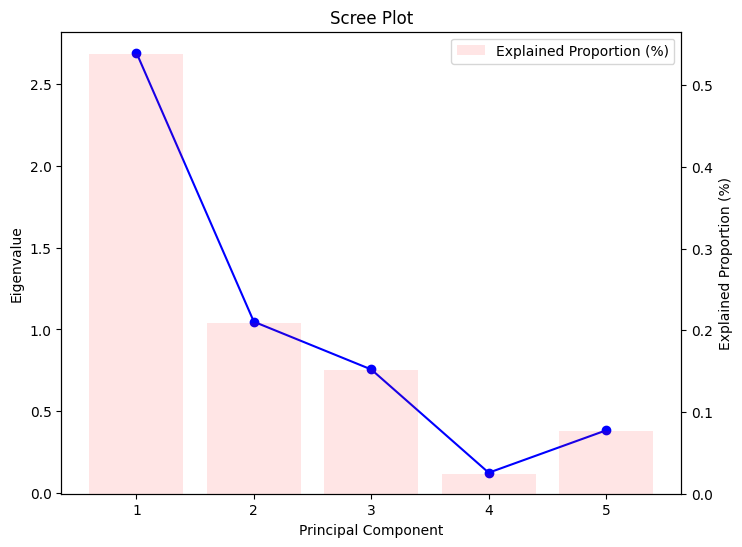

In [45]:
# Plotting the Scree plot

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), df_eigval_yld['Eigenvalues'], marker='o', linestyle='-', color='b', label='Eigenvalues')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, 6))
plt.grid(False)

# Plotting explained proportion as bars
plt.twinx()
plt.bar(range(1, 6), df_eigval_yld['Explained proportion'], alpha=0.1, color='r', label="Explained Proportion (%)")
plt.ylabel("Explained Proportion (%)")
plt.legend(loc="upper right")

# Show the plot
plt.show()

Q3. j) How does the screeplot from the uncorrelated data compare with the screeplot from the actual data?

The above scree plot is more in line with our expectations. The plot can be read as an elbow method. The elbow forming when the first principal component is explaining the highest variance and as the number of PCs increase, they explain lesser and lesser of the variance of the yield curve. In our case, the first three principal components explain about 92% of the data.

This observation is different than the uncorrelated gausian random variables case because the data was generated such that the random variables had a same variance. As a result there is no dominant direction, and the variance is equally spread across the 5 eigenvalues, so the PC algorithm finds similar eigenvalues for the 5 PCs.

Since principal components are dimentionality reduction techniques, they work well when the variables are closely correlated. From the following figure we see that the yield changes from the actual data is more correlated than the gaussian data generation process. Hence PCA performed better on the real data.

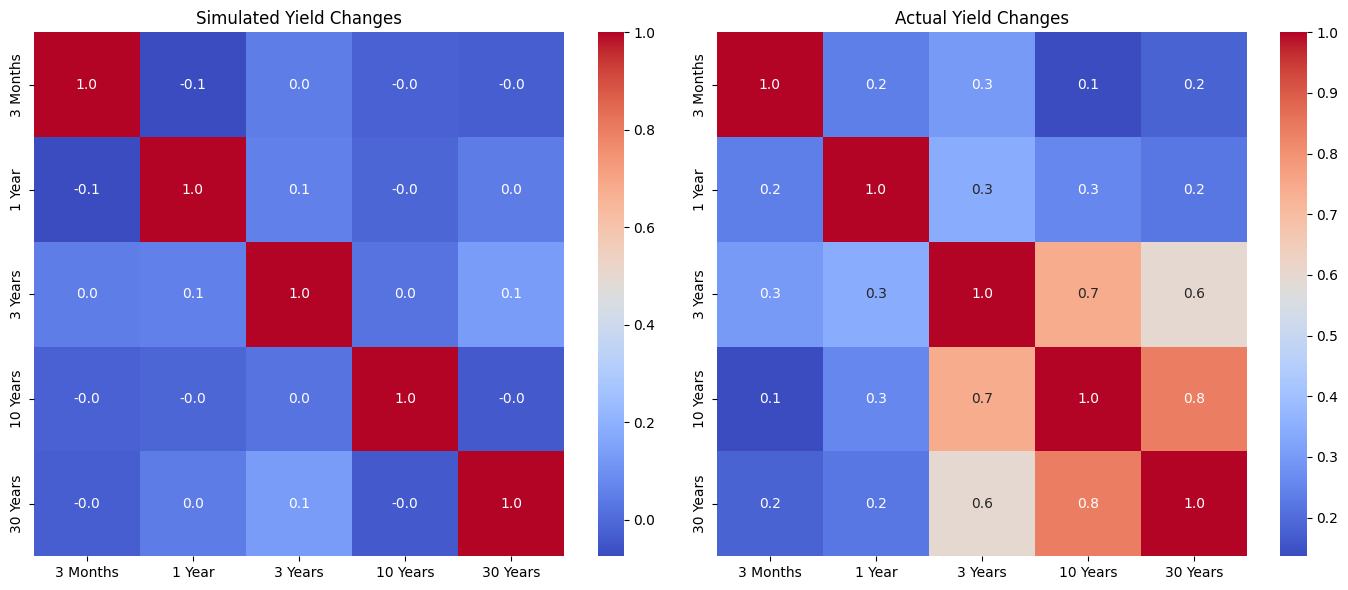

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Simulated yield changes
sns.heatmap(yc_standardised.corr(), annot=True, cmap='coolwarm', fmt=".1f", ax=axes[0])
axes[0].set_title('Simulated Yield Changes')

# Actual yield changes
sns.heatmap(standardized_yld_chag.corr(), annot=True, cmap='coolwarm', fmt=".1f", ax=axes[1])
axes[1].set_title('Actual Yield Changes')

plt.tight_layout()
plt.show()